In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

import matplotlib.pyplot as plt

# Load the compact dataset
df = pd.read_parquet("mushroom_compact.parquet", engine="fastparquet")

# 🍄 Mushroom Dataset — Full Data Dictionary (Kaggle Mushroom Overload)

---

## **Cap Characteristics**

### **cap-diameter (m)**
- **Type:** Continuous (float, cm)  
- **Description:** Diameter of the mushroom cap in centimeters.

---

### **cap-shape (n)**
- **Type:** Categorical  
- **Categories:**  
  - `b` = bell  
  - `c` = conical  
  - `x` = convex  
  - `f` = flat  
  - `s` = sunken  
  - `p` = spherical  
  - `o` = others  
- **Description:** Overall shape of the mushroom cap.

---

### **cap-surface (n)**
- **Type:** Categorical  
- **Categories:**  
  - `i` = fibrous  
  - `g` = grooves  
  - `y` = scaly  
  - `s` = smooth  
  - `d` = dry  
  - `h` = shiny  
  - `l` = leathery  
  - `k` = silky  
  - `t` = sticky  
  - `w` = wrinkled  
  - `e` = fleshy  
- **Description:** Surface texture of the mushroom cap.  
**(Your dataset contains 11 categories — this is correct.)**

---

### **cap-color (n)**
- **Type:** Categorical  
- **Categories:**  
  - `n` = brown  
  - `b` = buff  
  - `g` = gray  
  - `r` = green  
  - `p` = pink  
  - `u` = purple  
  - `e` = red  
  - `w` = white  
  - `y` = yellow  
  - `l` = blue  
  - `o` = orange  
  - `k` = black  
- **Description:** Color of the mushroom cap.

---

### **does-bruise-bleed (n)**
- **Type:** Categorical (binary)
- **Categories:**  
  - `t` = bruises / bleeds  
  - `f` = no  
- **Description:** Whether the mushroom bruises or bleeds when handled.

---

## **Gill Characteristics**

### **gill-attachment (n)**
- **Type:** Categorical  
- **Categories:**  
  - `a` = adnate  
  - `x` = adnexed  
  - `d` = decurrent  
  - `e` = free  
  - `s` = sinuate  
  - `p` = pores  
  - `f` = none  
  - `?` = unknown  
- **Description:** How the gills are attached to the stalk.

---

### **gill-spacing (n)**
- **Type:** Categorical  
- **Categories:**  
  - `c` = close  
  - `d` = distant  
  - `f` = none  
- **Description:** Spacing between the gills.

---

### **gill-color (n)**
- **Type:** Categorical  
- **Categories:** same as **cap-color** plus:  
  - `f` = none  
- **Description:** Color of the gills.

---

## **Stem Characteristics**

### **stem-height (m)**
- **Type:** Continuous (float, cm)  
- **Description:** Height of the stalk in centimeters.

---

### **stem-width (m)**
- **Type:** Continuous (float, mm)  
- **Description:** Width of the stalk in millimeters.

---

### **stem-root (n)**
- **Type:** Categorical  
- **Categories:**  
  - `b` = bulbous  
  - `s` = swollen  
  - `c` = club  
  - `u` = cup  
  - `e` = equal  
  - `z` = rhizomorphs  
  - `r` = rooted  
- **Description:** Shape of the stem base.

---

### **stem-surface (n)**
- **Type:** Categorical  
- **Categories:** same as **cap-surface** plus:  
  - `f` = none  
- **Description:** Surface texture of the stem.

---

### **stem-color (n)**
- **Type:** Categorical  
- **Categories:** same as **cap-color** plus:  
  - `f` = none  
- **Description:** Color of the stem.

---

## **Veil & Ring Characteristics**

### **veil-type (n)**
- **Type:** Categorical  
- **Categories:**  
  - `p` = partial  
  - `u` = universal  
- **Description:** Type of veil covering the mushroom.

---

### **veil-color (n)**
- **Type:** Categorical  
- **Categories:** same as **cap-color** +  
  - `f` = none  
- **Description:** Color of the veil.

---

### **has-ring (n)**
- **Type:** Categorical (binary)  
- **Categories:**  
  - `t` = has ring  
  - `f` = no ring  
- **Description:** Whether the mushroom stalk has a ring.

---

### **ring-type (n)**
- **Type:** Categorical  
- **Categories:**  
  - `c` = cobwebby  
  - `e` = evanescent  
  - `r` = flaring  
  - `g` = grooved  
  - `l` = large  
  - `p` = pendant  
  - `s` = sheathing  
  - `z` = zone  
  - `y` = scaly  
  - `m` = movable  
  - `f` = none  
  - `?` = unknown  
- **Description:** Type of ring on the stalk.

---

## **Other Key Traits**

### **spore-print-color (n)**
- **Type:** Categorical  
- **Categories:** same as **cap-color**  
- **Description:** Color of the spore print left by the mushroom.

---

### **habitat (n)**
- **Type:** Categorical  
- **Categories:**  
  - `g` = grasses  
  - `l` = leaves  
  - `m` = meadows  
  - `p` = paths  
  - `h` = heaths  
  - `u` = urban  
  - `w` = waste  
  - `d` = woods  
- **Description:** Habitat in which the mushroom grows.

---

### **season (n)**
- **Type:** Categorical  
- **Categories:**  
  - `s` = spring  
  - `u` = summer  
  - `a` = autumn  
  - `w` = winter  
- **Description:** Season when the mushroom appears.

---

## **Target Variable**

### **class (n)**
- **Type:** Categorical (binary target)  
- **Categories:**  
  - `e` = edible  
  - `p` = poisonous  
- **Description:** Edibility classification (your prediction target).



In [2]:
#basic EDA
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6723116 entries, 0 to 6723115
Data columns (total 21 columns):
 #   Column                Dtype   
---  ------                -----   
 0   class                 category
 1   cap-diameter          float64 
 2   cap-shape             category
 3   cap-surface           category
 4   cap-color             category
 5   does-bruise-or-bleed  category
 6   gill-attachment       category
 7   gill-spacing          category
 8   gill-color            category
 9   stem-height           float64 
 10  stem-width            float64 
 11  stem-root             category
 12  stem-surface          category
 13  stem-color            category
 14  veil-type             category
 15  veil-color            category
 16  has-ring              category
 17  ring-type             category
 18  spore-print-color     category
 19  habitat               category
 20  season                category
dtypes: category(18), float64(3)
memory usage: 269.3 MB


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,17.18,f,g,e,f,e,NaN,w,18.58,...,s,y,w,u,w,t,g,NaN,d,a
1,p,15.30,x,h,e,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.94,f,h,o,f,e,NaN,w,16.84,...,s,y,w,u,w,t,p,NaN,d,a
3,p,13.37,f,g,e,f,e,NaN,w,18.10,...,s,y,w,u,w,t,g,NaN,d,u
4,p,17.23,x,h,e,f,e,NaN,w,17.42,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
#### check for missing values
df.isna().sum()


class                         0
cap-diameter                  0
cap-shape                     0
cap-surface             1579337
cap-color                     0
does-bruise-or-bleed          0
gill-attachment         1066721
gill-spacing            2800709
gill-color                    0
stem-height                   0
stem-width                    0
stem-root               5763499
stem-surface            4263506
stem-color                    0
veil-type               6367343
veil-color              5893024
has-ring                      0
ring-type                276729
spore-print-color       6049365
habitat                       0
season                        0
dtype: int64

In [31]:
cols_to_drop = [
    "cap-surface",
    "gill-attachment",
    "gill-spacing",
    "stem-root",
    "stem-surface",
    "veil-type",
    "veil-color",
    "spore-print-color"
]

df = df.drop(columns=cols_to_drop)


In [32]:
#check the target distribution - proportions
df["class"].value_counts(normalize=True)

class
p    0.547393
e    0.452607
Name: proportion, dtype: float64

In [33]:
#check cardinality
#large categories make one hot encoding tough
df.nunique()
#2-10 categories is preferred -> more can be noisy

class                      2
cap-diameter            5408
cap-shape                  7
cap-color                 12
does-bruise-or-bleed       2
gill-color                12
stem-height             3400
stem-width              9514
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

In [34]:
#descriptivesof continuous variables
df.describe()

,cap-diameter,stem-height,stem-width
count,6.723116e+06,6.723116e+06,6.723116e+06
mean,6.792650e+00,6.697878e+00,1.236342e+01
std,5.279232e+00,3.300607e+00,9.967683e+00
min,2.200000e-01,0.000000e+00,-6.400000e-01
25%,3.520000e+00,4.710000e+00,5.470000e+00
50%,5.960000e+00,6.010000e+00,1.039000e+01
75%,8.600000e+00,7.790000e+00,1.672000e+01
max,6.689000e+01,3.770000e+01,1.186800e+02


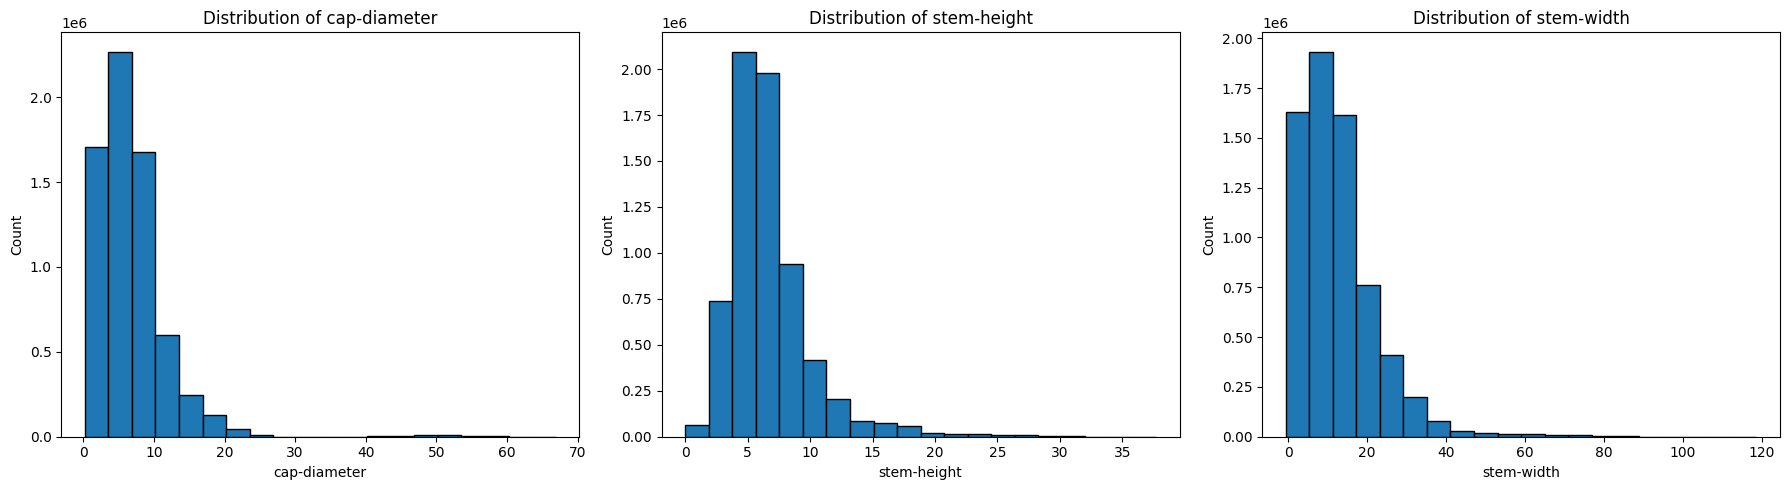

In [35]:
#histograms of continuous variables
continuous_vars = ['cap-diameter', 'stem-height', 'stem-width']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, continuous_vars):
    ax.hist(df[col], bins=20, edgecolor='black')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

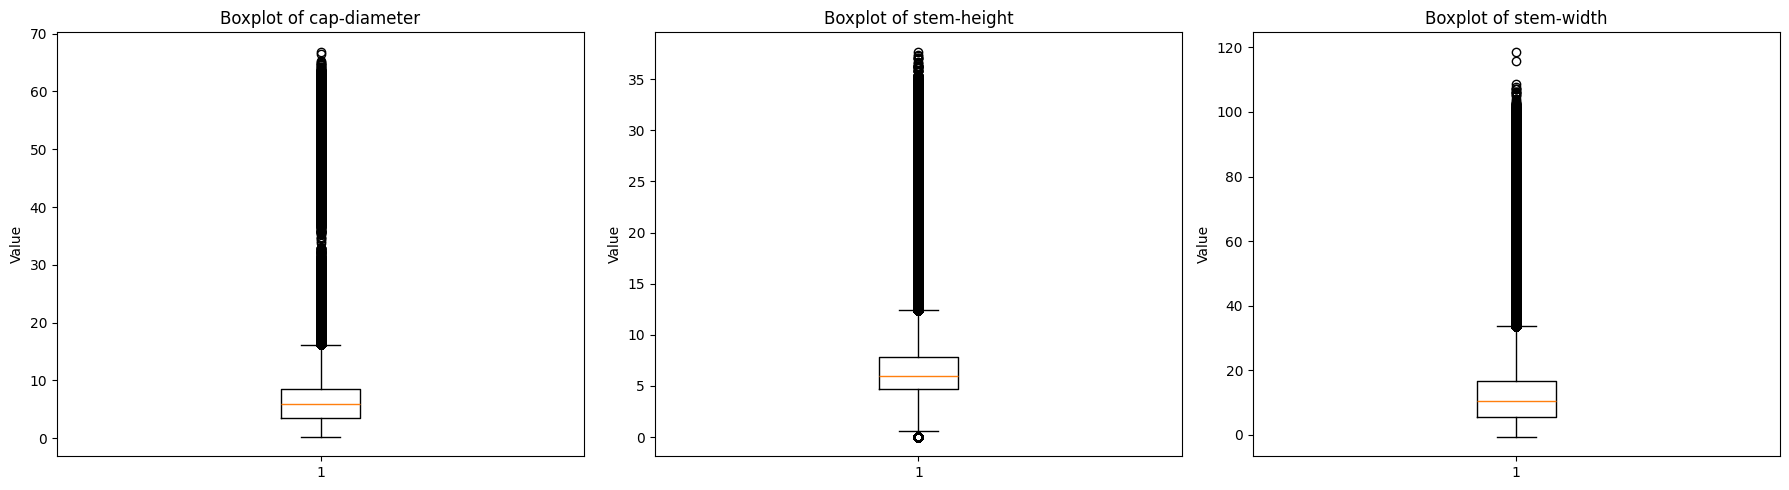

In [36]:
#boxplots for continuous variable
continuous_vars = ['cap-diameter', 'stem-height', 'stem-width']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, continuous_vars):
    ax.boxplot(df[col], vert=True)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel("Value")

plt.tight_layout()
plt.show()


C:\Users\rocke\AppData\Local\Temp\ipykernel_17240\1367604803.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df.loc[df['class_binary'] == 1, col],
C:\Users\rocke\AppData\Local\Temp\ipykernel_17240\1367604803.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df.loc[df['class_binary'] == 1, col],
C:\Users\rocke\AppData\Local\Temp\ipykernel_17240\1367604803.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df.loc[df['class_binary'] == 1, col],


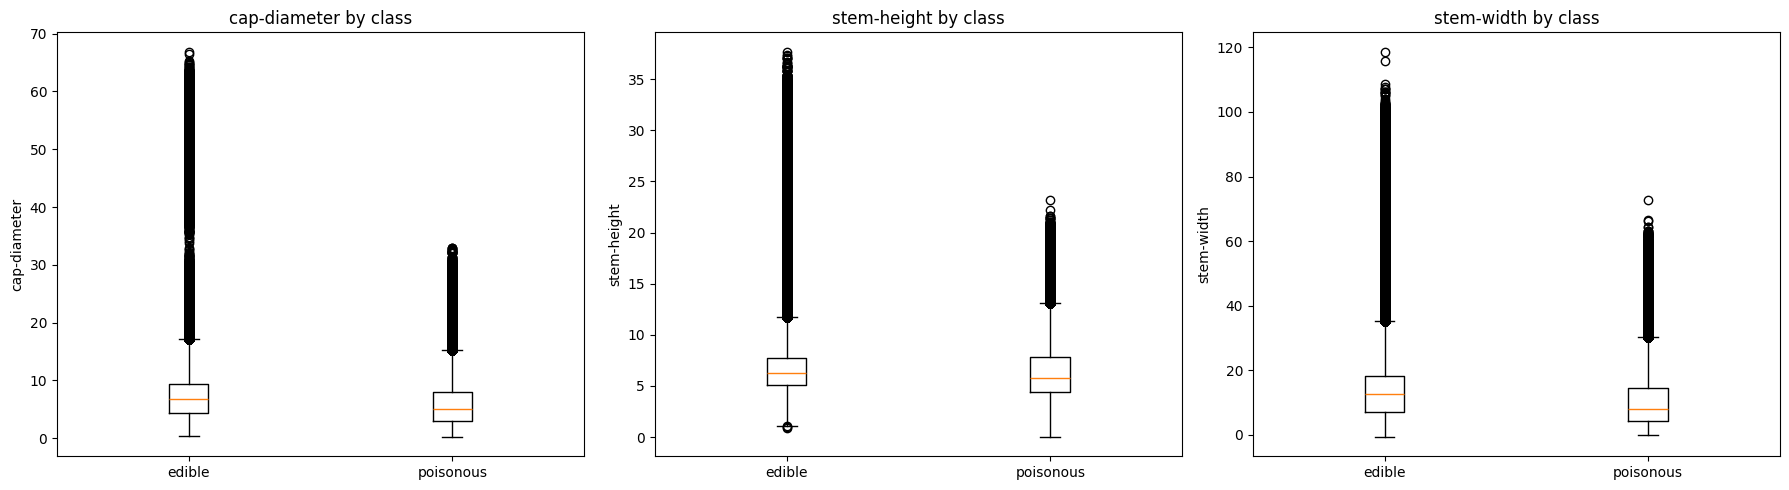

In [7]:
#boxplots grouped by target

#convert target to binary var
df['class_binary'] = df['class'].map({'e': 1, 'p': 0})

#box plots:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, continuous_vars):
    ax.boxplot([df.loc[df['class_binary'] == 1, col],
                df.loc[df['class_binary'] == 0, col]],
               labels=['edible', 'poisonous'])
    ax.set_title(f"{col} by class")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()



In [8]:
#pearson corr for continuous var
for col in continuous_vars:
    corr = df[col].corr(df['class_binary'])
    print(f"{col}: {corr:.4f}")


cap-diameter: 0.1748
stem-height: 0.0978
stem-width: 0.1827


In [37]:
#crosstabs for cat variables and target
target_col = "class"
cat_cols = df.select_dtypes(include='category').columns
cat_cols = [c for c in cat_cols if c != target_col]
for col in cat_cols:
    print(f"\n### Crosstab: {col} vs {target_col}\n")
    display(pd.crosstab(df[col], df[target_col], normalize='index'))



### Crosstab: cap-shape vs class



class,e,p
cap-shape,,
b,0.216545,0.783455
c,0.418346,0.581654
f,0.482542,0.517458
o,0.328543,0.671457
p,0.600297,0.399703
s,0.463067,0.536933
x,0.484321,0.515679



### Crosstab: cap-color vs class



class,e,p
cap-color,,
b,0.785502,0.214498
e,0.219114,0.780886
g,0.562195,0.437805
k,0.381184,0.618816
l,0.570056,0.429944
n,0.518445,0.481555
o,0.302928,0.697072
p,0.261908,0.738092
r,0.118116,0.881884



### Crosstab: does-bruise-or-bleed vs class



class,e,p
does-bruise-or-bleed,,
f,0.449606,0.550394
t,0.466622,0.533378



### Crosstab: gill-color vs class



class,e,p
gill-color,,
b,0.749693,0.250307
e,0.278624,0.721376
f,0.488996,0.511004
g,0.517596,0.482404
k,0.400334,0.599666
n,0.306925,0.693075
o,0.421237,0.578763
p,0.413943,0.586057
r,0.374778,0.625222



### Crosstab: stem-color vs class



class,e,p
stem-color,,
b,1.000000,0.000000
e,0.265872,0.734128
f,0.000000,1.000000
g,0.599524,0.400476
k,0.214703,0.785297
l,0.503634,0.496366
n,0.404914,0.595086
o,0.395384,0.604616
p,0.118961,0.881039



### Crosstab: has-ring vs class



class,e,p
has-ring,,
f,0.468871,0.531129
t,0.403257,0.596743



### Crosstab: ring-type vs class



class,e,p
ring-type,,
e,0.429323,0.570677
f,0.454787,0.545213
g,0.569698,0.430302
l,0.623509,0.376491
m,1.000000,0.000000
p,0.430120,0.569880
r,0.500240,0.499760
z,0.000000,1.000000



### Crosstab: habitat vs class



class,e,p
habitat,,
d,0.464962,0.535038
g,0.316402,0.683598
h,0.353254,0.646746
l,0.625862,0.374138
m,0.485151,0.514849
p,0.000000,1.000000
u,1.000000,0.000000
w,1.000000,0.000000



### Crosstab: season vs class



class,e,p
season,,
a,0.425746,0.574254
s,0.605003,0.394997
u,0.429609,0.570391
w,0.632206,0.367794


In [38]:
#cramer's v confusion matrix
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Compute Cramér's V between two categorical Series."""
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return 0.0
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    
    #bias correction
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    
    denom = min((kcorr - 1), (rcorr - 1))

    if denom <= 0:
        return 0.0  # no meaningful association

    return np.sqrt(phi2corr / denom)


In [39]:
target_col = "class"

cat_cols = df.select_dtypes(include='category').columns

scores = {}
for col in cat_cols:
    if col == target_col:
        continue
    scores[col] = cramers_v(df[col], df[target_col])

target_strength = pd.Series(scores).sort_values(ascending=False)
target_strength


stem-color              0.247945
cap-color               0.246233
ring-type               0.205618
gill-color              0.199085
habitat                 0.180448
cap-shape               0.174967
season                  0.132098
has-ring                0.056916
does-bruise-or-bleed    0.013024
dtype: float64

## Logistic Regression

In [9]:
cols_to_drop = [
    "cap-surface",
    "gill-attachment",
    "gill-spacing",
    "stem-root",
    "stem-surface",
    "veil-type",
    "veil-color",
    "spore-print-color"
]

df_LR = df.drop(columns=cols_to_drop)

In [10]:
#create binary target for poisonous/edible in class
df_model = df_LR.copy()
df_model["class_binary"] = df_model["class"].map({"e": 1, "p":0})
df_model["class_binary"].value_counts()

class_binary
0    3680184
1    3042932
Name: count, dtype: int64

In [11]:
#create lists of features
numeric_features=["cap-diameter", "stem-height", "stem-width"]

categorical_features = [ "stem-color", "cap-color", "ring-type","gill-color",
    "habitat", "cap-shape", "season", "has-ring", "does-bruise-or-bleed" ]

#Target
target_col = "class_binary"
df_model.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season',
       'class_binary'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
#set up X and y
X = df_model[numeric_features + categorical_features]
y = df_model[target_col]
#train/test split (80% train, 20% test for now)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # keep edible/poisonous proportions the same in each cohort
#recall: random state makes sure the same split is duplicated eachtime

In [15]:
#construct pipeline -> preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# z scale continuous variables
numeric_transformer = StandardScaler()

#one-hot encode
categorical_transformer = OneHotEncoder(handle_unknown="ignore",sparse_output=True)
#ignore unseen categories in test data
#keep it sparse -> ignore 0s to make run faster


#Combine them into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"  #drop any other columns just in case
)



In [19]:
#pipeline ->baseline run
log_reg_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("logreg", LogisticRegression(
            max_iter=1000,              #give it enough iterations to converge
            n_jobs=-1))])  #use all cores if available
        
    


In [21]:
#run baseline
log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['stem-color', 'cap-color',
                                                   'ring-type', 'gill-color',
                                                   'habitat', 'cap-shape',
                                                   'season', 'has-ring',
                                                   'does-bruise-or-bleed'])])),
                ('logreg', LogisticRegression(max_iter=1000, n_jobs=-1))])

In [22]:
#### baseline predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Predict on test set
y_pred = log_reg_model.predict(X_test)


In [23]:
#accuracy 
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7420


In [26]:
#confusion matrix:
cm = confusion_matrix(y_test, y_pred)
cm
import pandas as pd

cm_df = pd.DataFrame(
    cm,
    index=["Actual: poisonous (0)", "Actual: edible (1)"],
    columns=["Predicted: poisonous (0)", "Predicted: edible (1)"]
)
cm_df


,Predicted: poisonous (0),Predicted: edible (1)
Actual: poisonous (0),568215,167822
Actual: edible (1),179103,429484


In [25]:
#class report
print(classification_report(y_test, y_pred, target_names=["poisonous", "edible"]))


              precision    recall  f1-score   support

   poisonous       0.76      0.77      0.77    736037
      edible       0.72      0.71      0.71    608587

    accuracy                           0.74   1344624
   macro avg       0.74      0.74      0.74   1344624
weighted avg       0.74      0.74      0.74   1344624



In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "logreg__C": [0.01, 0.1, 1, 10, 100],
    "logreg__solver": ["lbfgs", "saga"]
}


grid_search = GridSearchCV(
    estimator=log_reg_model,
    param_grid=param_grid,
    cv=3,  #3-fold cross-validation
    scoring="accuracy", #optimize for accuracy
    n_jobs=-1, 
    verbose=2  #to see progress
)


In [28]:
#use a sample b/c all 6 million take too long

X_train_sample = X_train.sample(n=500_000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]


In [29]:
#run the grid search
grid_search.fit(X_train_sample, y_train_sample)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['cap-diameter',
                                                                          'stem-height',
                                                                          'stem-width']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['stem-color',
                                                                          'cap-color',
                                                                          'ring-type',
                                                                          'gill-color',
                                                                          'habitat',
                                                                          'cap-shape',
                                                                          'season',
                                                                          'has-ring',
                                                                          'does-bruise-or-bleed'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=2)

In [30]:
#Best choices from gridsearch:
print("Best params:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best params: {'logreg__C': 0.01, 'logreg__solver': 'saga'}
Best CV accuracy: 0.7442439991939525


In [31]:
#use on the test data
best_log_reg = grid_search.best_estimator_

y_test_pred = best_log_reg.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

test_accuracy_tuned = accuracy_score(y_test, y_test_pred)
print(f"Tuned Test Accuracy: {test_accuracy_tuned:.4f}")

cm_tuned = confusion_matrix(y_test, y_test_pred)
cm_tuned_df = pd.DataFrame(
    cm_tuned,
    index=["Actual: poisonous (0)", "Actual: edible (1)"],
    columns=["Predicted: poisonous (0)", "Predicted: edible (1)"]
)
cm_tuned_df


Tuned Test Accuracy: 0.7445


,Predicted: poisonous (0),Predicted: edible (1)
Actual: poisonous (0),571327,164710
Actual: edible (1),178786,429801


In [32]:
print(classification_report(y_test, y_test_pred, target_names=["poisonous", "edible"]))


              precision    recall  f1-score   support

   poisonous       0.76      0.78      0.77    736037
      edible       0.72      0.71      0.71    608587

    accuracy                           0.74   1344624
   macro avg       0.74      0.74      0.74   1344624
weighted avg       0.74      0.74      0.74   1344624



In [33]:
#build the pipeline using bernouliNB
from sklearn.naive_bayes import BernoulliNB
nb_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),   #the existing columntransformer
        ("nb", BernoulliNB())
    ])


In [34]:
#fit the new model
nb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['stem-color', 'cap-color',
                                                   'ring-type', 'gill-color',
                                                   'habitat', 'cap-shape',
                                                   'season', 'has-ring',
                                                   'does-bruise-or-bleed'])])),
                ('nb', BernoulliNB())])

In [35]:
#put test data in model and give results
nb_pred = nb_pipeline.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_accuracy

0.6856035590618641

In [36]:
#class report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71    736037
           1       0.65      0.65      0.65    608587

    accuracy                           0.69   1344624
   macro avg       0.68      0.68      0.68   1344624
weighted avg       0.69      0.69      0.69   1344624



In [37]:
#confusion matrix

cm = confusion_matrix(y_test, nb_pred)

pd.DataFrame(cm,
    index=["Actual Poisonous (0)", "Actual Edible (1)"],
    columns=["Pred Poisonous (0)", "Pred Edible (1)"])


,Pred Poisonous (0),Pred Edible (1)
Actual Poisonous (0),528224,207813
Actual Edible (1),214932,393655


In [38]:
#gridsearch

param_grid = {
    "nb__alpha": [0.1, 0.5, 1.0, 2.0, 5.0],
    "nb__fit_prior": [True, False]}

nb_gs = GridSearchCV(nb_pipeline, param_grid, cv=3, n_jobs=-1)

nb_gs.fit(X_train, y_train)

nb_gs.best_params_, nb_gs.best_score_


({'nb__alpha': 0.1, 'nb__fit_prior': False}, np.float64(0.6878355491500486))